# Analysis of simulations of 2D Ising model with Glauber - Metropolis Algorithm

#### Marco Zenari

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os #to read file names
import re #regular expression to infer parameters from filenames

In [2]:
#Creating a list with the names of the files
path='data/'
filenames = os.listdir(path)
filenames = sorted(filenames,) #ordering the filenames

Functions to compute the autocorrelation function of a time-series and the correlation time

In [3]:
def autocorrelation_function(O, max_time = 5000):
    #takes in input a time-series   
    O = np.array(O)
    if(len(O)>max_time):
        t_max=max_time
    else:
        t_max = len(O)
        
    C = np.zeros(t_max)
    for t in range(t_max):
        C1=1/(t_max-t)*np.sum(O[:t_max-t]*O[t:t_max])
        C2=1/(t_max-t)*np.sum(O[:t_max-t])
        C3=1/(t_max-t)*np.sum(O[t:t_max])
        C[t]=C1-C2*C3
    return C

In [4]:
def autocorrelation_time(C):
    tau = np.argmax(C<C[0]/np.e)
    return tau

## Analysis of one simulation

In [5]:
file = filenames[-4]

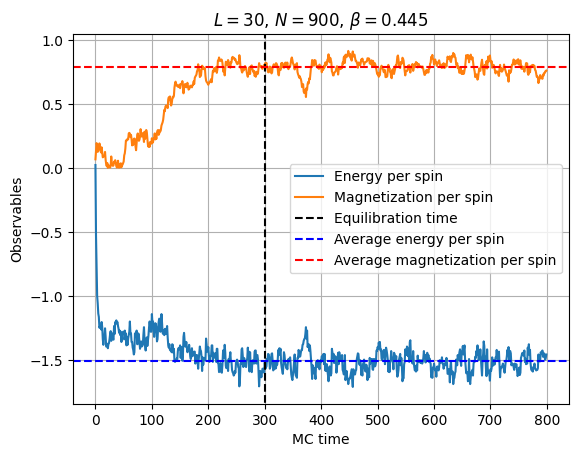

In [6]:
#equilibration time
t_eq = 300
t_cut = 800

#choosing the file to analyze and loading the data
data = np.loadtxt(fname=path+file)

#extract parameters of the simulation with regex
pattern_N = r'N(.*?)_'
N = int(re.search(pattern_N, file).group(1))

pattern_L = r'L(.*?)_'
L = int(re.search(pattern_L, file).group(1))

pattern_beta = r'beta(.*?)time'
beta = float(re.search(pattern_beta, file).group(1))

pattern_time = r'time(.*?).txt'
time = int(re.search(pattern_time, file).group(1))

#Saving data in a Pandas Dataframe
df = pd.DataFrame(data, columns=['time', 'energy', 'magnetization'])

#adding energy per spin observable
df['energy_per_spin']=df['energy']/N
df['mag_per_spin']=np.abs(df['magnetization'])/N


#computing the correlation time of each observable
C_mag = autocorrelation_function(df['mag_per_spin'][t_eq:])
tau_mag=autocorrelation_time(C_mag)

C_en = autocorrelation_function(np.array(df['energy_per_spin'][t_eq:]))
tau_en = autocorrelation_time(C_en)

## COMPUTING AVERAGES SAMPLING EVERY TAU_AUTOCORRELATION
#computing averages and fluctuations of observables
av_mag = np.mean(df['mag_per_spin'][t_eq:t_cut][0::tau_mag])
var_mag =np.mean((df['mag_per_spin'][t_eq:][0::tau_mag]-av_mag)**2)

av_en = np.mean(df['energy_per_spin'][t_eq:t_cut][0::tau_en])
var_en = np.mean((df['energy_per_spin'][t_eq:][0::tau_en]-av_en)**2)



#Plot of observables
plt.figure()
plt.plot(df['time'][:t_cut], df['energy_per_spin'][:t_cut], label = 'Energy per spin')
plt.plot(df['time'][:t_cut], df['mag_per_spin'][:t_cut], label = 'Magnetization per spin')
plt.axvline(t_eq, color='black', ymin=-2, ymax=1, 
            linestyle='dashed', label='Equilibration time')
plt.xlabel('MC time')
plt.ylabel('Observables')
plt.axhline(y=av_en, linestyle='--', color='blue', label = 'Average energy per spin')
plt.axhline(y=av_mag, linestyle='--', color = 'red', label = 'Average magnetization per spin')
plt.legend()
plt.title(r'$L={}$, $N={}$, $\beta={}$'.format(L, N, beta))
plt.grid()
plt.savefig('plots/plot_observables_{}.png'.format(file))

## Analysis of simulations

Equilibration time of each simulation classified by hand

In [7]:
equilibration_times = [40000 for i in range(len(filenames))]

In [8]:
## Data frame to save summary of simulations
col =['L', 'N', 'beta', 'time', 't_eq',
      'av_mag', 'var_mag', 't_aut_mag',
      'av_en', 'var_en', 't_aut_en']
df_simul=pd.DataFrame(columns= col)

## Df with summary results of simulations

In [9]:
df_simul =pd.read_csv('df_simul.csv')

In [10]:
df_simul

Unnamed: 0     L      N   beta      time     t_eq    av_mag   var_mag  \
0             0  10.0  100.0  0.411  500000.0  40000.0  0.600151  0.062791   
1             1  10.0  100.0  0.412  500000.0  40000.0  0.607840  0.062115   
2             2  10.0  100.0  0.413  500000.0  40000.0  0.610838  0.062604   
3             3  10.0  100.0  0.414  500000.0  40000.0  0.617959  0.061735   
4             4  10.0  100.0  0.415  500000.0  40000.0  0.624030  0.061456   
..          ...   ...    ...    ...       ...      ...       ...       ...   
146         146  30.0  900.0  0.444  500000.0  40000.0  0.699001  0.023441   
147         147  30.0  900.0  0.445  500000.0  40000.0  0.705625  0.023620   
148         148  30.0  900.0  0.446  500000.0  40000.0  0.727083  0.018078   
149         149  30.0  900.0  0.447  500000.0  40000.0  0.728997  0.018466   
150         150  30.0  900.0  0.448  500000.0  40000.0  0.735223  0.020255   

     t_aut_mag     av_en    var_en  t_aut_en        Cv        Xt  
0         15.0 -1.265676  0.074041       8.0  0.012507  2.580695  
1         11.0 -1.273374  0.073938       7.0  0.012551  2.559136  
2         17.0 -1.278810  0.073672      10.0  0.012566  2.585551  
3         16.0 -1.286012  0.074132       9.0  0.012706  2.555815  
4         12.0 -1.294772  0.074030       7.0  0.012750  2.550420  
..         ...       ...       ...       ...       ...       ...  
146       58.0 -1.465235  0.009683      14.0  0.001909  9.366954  
147      124.0 -1.472237  0.009737      27.0  0.001928  9.459762  
148       58.0 -1.484893  0.009032      17.0  0.001797  7.256590  
149      101.0 -1.491356  0.009058      19.0  0.001810  7.429046  
150      183.0 -1.497395  0.009248      26.0  0.001856  8.166682  

[151 rows x 14 columns]

## Estimation of critical temperature

In [11]:
L_values = np.unique(np.array(df_simul['L']))
beta_values = np.unique(np.array(df_simul['beta']))
T_values = 1/beta_values

In [12]:
T_c_theo=2/np.log(1+np.sqrt(2)) #theoretical prediction
beta_c_theo = 1/T_c_theo

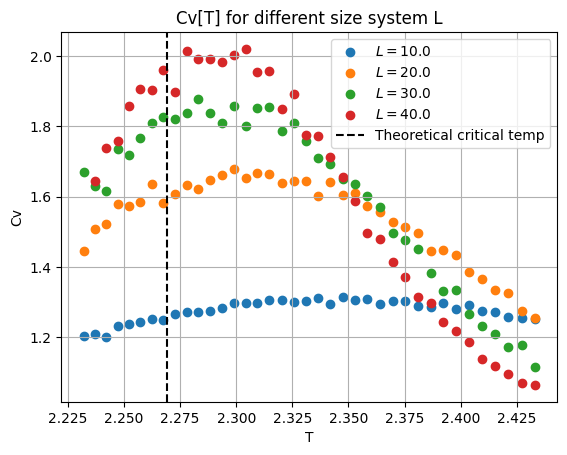

In [16]:
#Plot of Cv as function of T for differents L
for L in L_values:
   # plt.plot(1/df_simul['beta'][df_simul['L']==L], (df_simul['Cv']*df_simul['N'])[df_simul['L']==L])
    plt.scatter(1/df_simul['beta'][df_simul['L']==L], (df_simul['Cv']*df_simul['N'])[df_simul['L']==L], label=r'$L={}$'.format(L))
    plt.xlabel('T')
    plt.ylabel('Cv')
    plt.title('Cv[T] for different size system L')



plt.axvline(T_c_theo, color='black',linestyle='dashed', label='Theoretical critical temp')
plt.legend()
#plt.yscale('log')

plt.grid()
plt.savefig('plots/plot_specific_heat.png')

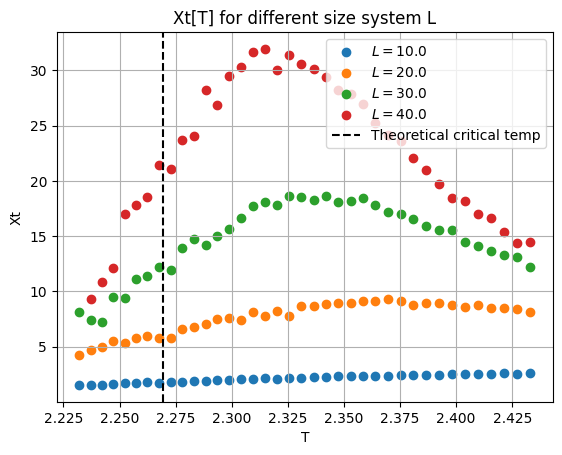

In [17]:
#Plot of Xt as function of T for differents L

for L in L_values:
    #plt.plot(1/df_simul['beta'][df_simul['L']==L], df_simul['Xt'][df_simul['L']==L])
    plt.scatter(1/df_simul['beta'][df_simul['L']==L], df_simul['Xt'][df_simul['L']==L], label=r'$L={}$'.format(L))


plt.xlabel('T')
plt.ylabel('Xt')
plt.title('Xt[T] for different size system L')
#plt.yscale('log')

plt.axvline(T_c_theo, color='black',linestyle='dashed', label='Theoretical critical temp')
plt.legend()

plt.grid()
plt.savefig('plots/plot_magnetic_susceptibility.png')

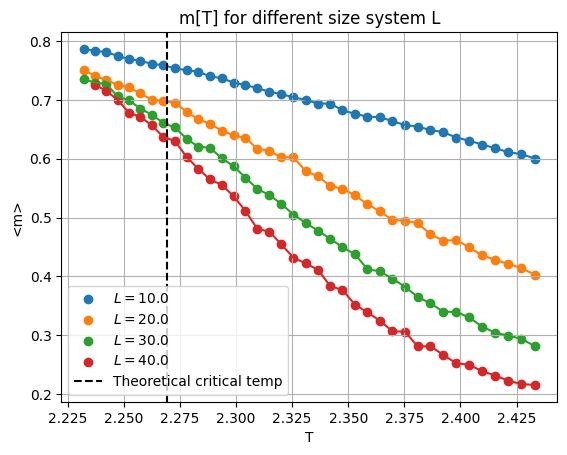

In [18]:
#Plot of <m> as function T for differents L
for L in L_values:

    plt.plot(1/df_simul['beta'][df_simul['L']==L], df_simul['av_mag'][df_simul['L']==L])
    plt.scatter(1/df_simul['beta'][df_simul['L']==L],np.abs(df_simul['av_mag'][df_simul['L']==L]), label=r'$L={}$'.format(L)) 

plt.xlabel('T')
plt.ylabel('<m>')
plt.title('m[T] for different size system L')


plt.axvline(T_c_theo, color='black',linestyle='dashed', label='Theoretical critical temp')
plt.legend()


plt.grid()
plt.savefig('plots/plot_magnetization_per_spin.png')

## Critical exponents at critical temperature

In [19]:
L_values

array([10., 20., 30., 40.])

In [20]:
beta_values

array([0.411, 0.412, 0.413, 0.414, 0.415, 0.416, 0.417, 0.418, 0.419,
       0.42 , 0.421, 0.422, 0.423, 0.424, 0.425, 0.426, 0.427, 0.428,
       0.429, 0.43 , 0.431, 0.432, 0.433, 0.434, 0.435, 0.436, 0.437,
       0.438, 0.439, 0.44 , 0.441, 0.442, 0.443, 0.444, 0.445, 0.446,
       0.447, 0.448])

In [21]:
T_values

array([2.43309002, 2.42718447, 2.42130751, 2.41545894, 2.40963855,
       2.40384615, 2.39808153, 2.3923445 , 2.38663484, 2.38095238,
       2.37529691, 2.36966825, 2.36406619, 2.35849057, 2.35294118,
       2.34741784, 2.34192037, 2.3364486 , 2.33100233, 2.3255814 ,
       2.32018561, 2.31481481, 2.30946882, 2.30414747, 2.29885057,
       2.29357798, 2.28832952, 2.28310502, 2.27790433, 2.27272727,
       2.2675737 , 2.26244344, 2.25733634, 2.25225225, 2.24719101,
       2.24215247, 2.23713647, 2.23214286])

Critical temperatures for each L, estimated from the plots

In [22]:
beta_crit = [0.426, 0.437, 0.438, 0.437]  

In [23]:
## Data frame to save summary of simulations
col =['row', 'L', 'N', 'beta', 'time', 't_eq',
      'av_mag', 'var_mag', 't_aut_mag',
      'av_en', 'var_en', 't_aut_en', 'Cv', 'Xt']
df_critical = pd.DataFrame(columns= col)

In [24]:
for L, beta in zip(L_values, beta_crit):
    df_critical.loc[len(df_critical)]=np.array(df_simul[(df_simul['beta']==beta) & (df_simul['L']==L)])[0]

### Estimation of $\beta$ critical exponent

In [34]:
y = np.log(np.array(df_critical['av_mag']))
x = np.log(np.array(df_critical['L']))
nu=1

In [35]:
##Fit
fit=np.polyfit(x,y,deg=1)
exp_beta=-fit[0]*nu

x_fit =np.linspace(2.1, 4, 100)
y_fit = fit[0]*x_fit+fit[1]

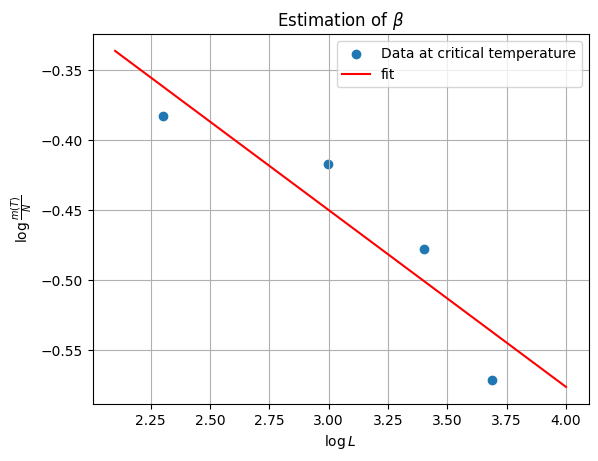

In [36]:
plt.scatter(x, y, label='Data at critical temperature')
plt.xlabel(r'$\log{L}$')
plt.plot(x_fit, y_fit, label = 'fit', c='r')
plt.ylabel(r'$\log{\frac{m(T)}{N}}$')
plt.title(r'Estimation of $\beta$')
plt.legend()
plt.grid()
plt.savefig('plots/estimation_of_beta.png')

In [28]:
exp_beta

0.12646730363630698

### Estimation of $\gamma$ critical exponent

In [29]:
y = np.log(np.array(df_critical['Xt']))
x = np.log(np.array(df_critical['L']))
nu=1

In [30]:
##Fit
fit=np.polyfit(x,y,deg=1)
exp_gamma=fit[0]*nu


x_fit =np.linspace(2.1, 4, 100)
y_fit = fit[0]*x_fit+fit[1]

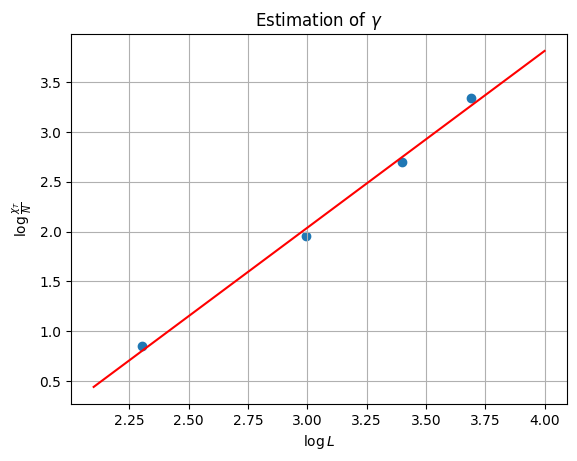

In [33]:
plt.scatter(x, y, label='Data at critical temperature')
plt.xlabel(r'$\log{L}$')
plt.ylabel(r'$\log{\frac{\chi_T}{N}}$')
plt.plot(x_fit, y_fit, label = 'fit', c='red')
plt.title(r'Estimation of $\gamma$')
plt.grid()
plt.savefig('plots/estimation_of_gamma.png')

In [32]:
exp_gamma

1.77256044530704